# Projet : Physique des matériaux
## Louis Noirot
###### LMAPR1492

In [1]:
import numpy as np
import itertools
from mp_api.client import MPRester

from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.analysis.structure_matcher import StructureMatcher
from pymatgen.io.cif import CifWriter
from pymatgen.electronic_structure.core import Spin
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.bandstructure import HighSymmKpath

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

from jupyter_jsmol.pymatgen import quick_view
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
from IPython.display import display

In [2]:
mp_key = "g2nCFD5rMkPRt9qdpOGhbfHJf2mgbv5x"
mp_id = "mp-14116"

In [3]:
hbarre = 6.62607015e-34/(2*np.pi)
eV = 1.6022e-19 # pour passer de J à eV
A = 1e-10
toHz = 1e12 # pour passer de THz à Hz

In [4]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
    structure = m.get_structure_by_material_id(mp_id)
    band = m.get_bandstructure_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Exporter en CIF avec symétries
writer = CifWriter(conv_struc, symprec=0.01)
writer.write_file("data/CuRhO2_fixed.cif")

# Tâche 6 :
#### Déterminer les 3 premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.

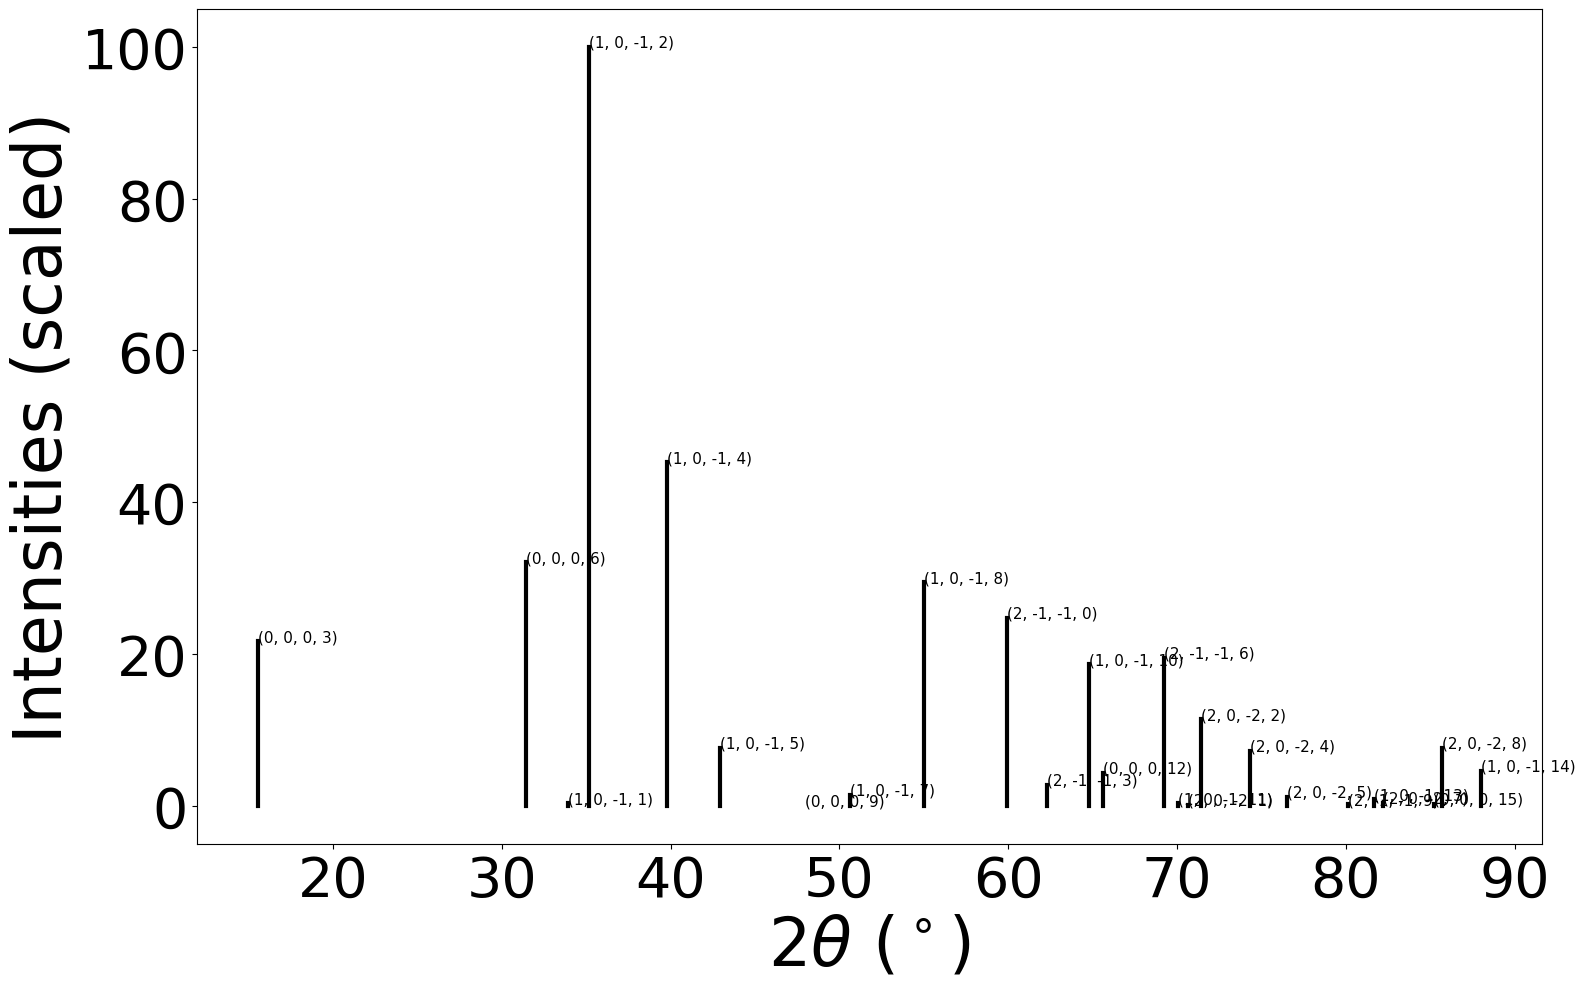

In [6]:
xrd = XRDCalculator(wavelength = 1.54060)  # rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.
xrd.get_plot(conv_struc, annotate_peaks='full', fontsize=11)
pattern = xrd.get_pattern(conv_struc)

In [7]:
for i in range(3):
    theta2 = pattern.x[i]
    intensity = pattern.y[i]
    indices_hkl = pattern.hkls[i][0].get("hkl")
    multiplicity = pattern.hkls[i][0].get("multiplicity")
    print("* Pic numéro " + str(i+1) +":")
    print(" - L'angle 2θ vaut: " + str(theta2) +"°")
    print(" - L'intensité relative de ce pic (sur une échelle de 0 à 100) est de: " +str(intensity))
    print(" - Les indices (h,k,l) sont " + str(indices_hkl) +"  et de multiplicité " + str(multiplicity) +"\n\n")

* Pic numéro 1:
 - L'angle 2θ vaut: 15.565215697861834°
 - L'intensité relative de ce pic (sur une échelle de 0 à 100) est de: 21.668350223294134
 - Les indices (h,k,l) sont (0, 0, 0, 3)  et de multiplicité 2


* Pic numéro 2:
 - L'angle 2θ vaut: 31.42728348308207°
 - L'intensité relative de ce pic (sur une échelle de 0 à 100) est de: 32.118210806657736
 - Les indices (h,k,l) sont (0, 0, 0, 6)  et de multiplicité 2


* Pic numéro 3:
 - L'angle 2θ vaut: 33.925222287826905°
 - L'intensité relative de ce pic (sur une échelle de 0 à 100) est de: 0.32186718097014516
 - Les indices (h,k,l) sont (1, 0, -1, 1)  et de multiplicité 12


